In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv("C:\\mydata\\Download Data\\carvan_train.csv")
df_test = pd.read_csv("C:\\mydata\\Download Data\\carvan_test.csv")

In [3]:
df_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df_train["V86"].unique()

array([0, 1], dtype=int64)

In [6]:
df_train["data"] = "train"
df_test["data"]= "test"

In [7]:
df_test.shape, df_train.shape

((4000, 86), (5822, 87))

In [8]:
predictors = df_train.drop(['V86','data'],1)
target = df_train['V86']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(predictors,
                                               target,test_size=0.2,
                                          random_state=2)

In [10]:
scaler = StandardScaler().fit(x_train)

sd_x_train=scaler.transform(x_train)
sd_x_test=scaler.transform(x_test)
x_test_1 = df_test.drop(['data'],1)
sd_sd_x_test_1=scaler.transform(x_test_1)

In [11]:
target.value_counts()

0    5474
1     348
Name: V86, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE
x_s, y_s = SMOTE(sampling_strategy="minority", 
                                k_neighbors=1).fit_resample(predictors, target)

In [13]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_s,y_s,test_size=0.3,random_state=5)

In [14]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix

Testing Accuracy  87.6103500761035


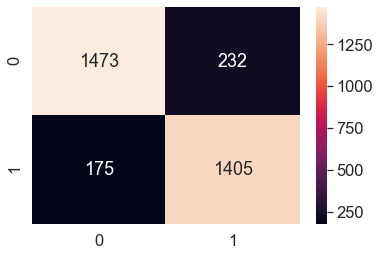

In [13]:
#Model
LR = LogisticRegression(solver="sag", max_iter=10000)

#fiting the model
LR.fit(X_train_s, y_train_s)

#prediction
y_pred = LR.predict(X_test_s)

#Accuracy
print("Testing Accuracy ", LR.score(X_test_s, y_test_s)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test_s)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [14]:
from sklearn.metrics import fbeta_score
#y_pred= model.predict(x_test)
fbeta_score(y_test_s, y_pred, beta=2)

0.8642962598425198

In [15]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [22]:
t=df_test.drop(['data'],1)

In [23]:

y_pred_s = LR.predict(t)

In [24]:
y_pred_s

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [16]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [19]:
S_train, S_test = stacking(models, X_train_s, y_train_s, X_test_s, 
                           regression=False, mode='oof_pred_bag', 
                           needs_proba=False, save_dir=None, 
                           metric=accuracy_score, n_folds=4, 
                           stratified=True, shuffle=True, 
                           random_state=0,    
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.87271779]
    fold  1:  [0.88048017]
    fold  2:  [0.87937337]
    fold  3:  [0.87519582]
    ----
    MEAN:     [0.87694179] + [0.00313541]
    FULL:     [0.87694115]

model  1:     [RandomForestClassifier]
    fold  0:  [0.74752217]
    fold  1:  [0.77244259]
    fold  2:  [0.76344648]
    fold  3:  [0.73681462]
    ----
    MEAN:     [0.75505646] + [0.01380399]
    FULL:     [0.75505677]

model  2:     [XGBClassifier]
    fold  0:  [0.90453834]
    fold  1:  [0.90448852]
    fold  2:  [0.91488251]
    fold  3:  [0.91540470]
    ----
    MEAN:     [0.90982852] + [0.00531832]
    FULL:     [0.90982644]



In [21]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train_s)
y_pred = model.predict(S_test)
#print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

In [27]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import fbeta_score
#y_pred= model.predict(x_test)
fbeta_score(y_test_s, y_pred, beta=2)

0.9433617539585872

In [25]:
t=df_test.drop(['data'],1)


In [28]:
S_train, t_test = stacking(models, X_train_s, y_train_s, t, 
                           regression=False, mode='oof_pred_bag', 
                           needs_proba=False, save_dir=None, 
                           metric=accuracy_score, n_folds=4, 
                           stratified=True, shuffle=True, 
                           random_state=0,    
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.87271779]
    fold  1:  [0.88048017]
    fold  2:  [0.87937337]
    fold  3:  [0.87519582]
    ----
    MEAN:     [0.87694179] + [0.00313541]
    FULL:     [0.87694115]

model  1:     [RandomForestClassifier]
    fold  0:  [0.74752217]
    fold  1:  [0.77244259]
    fold  2:  [0.76344648]
    fold  3:  [0.73681462]
    ----
    MEAN:     [0.75505646] + [0.01380399]
    FULL:     [0.75505677]

model  2:     [XGBClassifier]
    fold  0:  [0.90453834]
    fold  1:  [0.90448852]
    fold  2:  [0.91488251]
    fold  3:  [0.91540470]
    ----
    MEAN:     [0.90982852] + [0.00531832]
    FULL:     [0.90982644]



In [29]:
y_pred_s = model.predict(t_test)

In [30]:
y_pred_s

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
import csv

with open('P2.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(y_pred_s)
csvFile.close()